In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
%matplotlib inline

# Stanford Open Policing Project

In [26]:
# Road Islands police data import
ri = pd.read_csv('police.csv')

In [27]:
# First two rows
ri.head(2)

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [28]:
# No. of (rows, columns)
ri.shape

(91741, 15)

In [29]:
# Datatypes of columns
ri.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [30]:
# Checking null values
ri.isna().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

## 1. Remove the column that only contains missing values

In [31]:
# Delete column that only has missing data [county_name]
ri.drop(columns = 'county_name', axis = 1, inplace = True)

#Method II : ri.dropna(axis = 1, how = 'all') column whose all value are null

## 2. Do men or women speed more often

In [46]:
ri[ri.violation == 'Speeding'].driver_gender.value_counts()

M    32979
F    15482
Name: driver_gender, dtype: int64

In [50]:
# For percentages, use normalize
ri[ri.violation == 'Speeding'].driver_gender.value_counts(normalize = True) * 100

M    68.052661
F    31.947339
Name: driver_gender, dtype: float64

In [53]:
#Method II NAIVE
(ri[ri.driver_gender == 'M'].violation == 'Speeding').sum()

32979

In [60]:
# Method III
ri.groupby('driver_gender').violation.value_counts(normalize = True).loc[:,'Speeding']

driver_gender
F    0.65850
M    0.52435
Name: violation, dtype: float64

## 3. Does gender affect who gets searched during a stop?


In [81]:
# Since mean for a boolean column always returns mean of 'True' values
ri.groupby('driver_gender').search_conducted.mean() * 100

driver_gender
F    2.003318
M    4.332618
Name: search_conducted, dtype: float64

In [91]:
# We can groupby multipe columns at once
ri.groupby(['violation', 'driver_gender']).search_conducted.mean() * 100
# We can clearly see males violating more than females

violation            driver_gender
Equipment            F                 4.262163
                     M                 7.008086
Moving violation     F                 3.620474
                     M                 5.983103
Other                F                 5.652174
                     M                 4.714640
Registration/plates  F                 6.614018
                     M                11.037619
Seat belt            F                 1.259843
                     M                 3.798015
Speeding             F                 0.871980
                     M                 2.492495
Name: search_conducted, dtype: float64

## 4. Why is search_type missing so often?

In [95]:
ri.search_conducted.value_counts(normalize = True) * 100
#Since no search is done for 96.5% of violations, search_type is missing.

False    96.51628
True      3.48372
Name: search_conducted, dtype: float64

In [101]:
#ri[ri.search_conducted == False].search_type.value_counts() returns empty
# By default null values are not counted, use dropna argument
ri[ri.search_conducted == False].search_type.value_counts(dropna = False)

NaN    88545
Name: search_type, dtype: int64

## 5. During a search, how often is a driver frisked?

In [114]:
ri[ri.search_conducted == True].search_type.str.contains('Frisk').value_counts() 
# driver is frisked 8.57/274 of time when a search is conducted
# Pandas calculation ignore missing values

False    2922
True      274
Name: search_type, dtype: int64

## 6. Which year had the least number of stops?

In [133]:
(pd.to_datetime(ri['stop_date']).dt.year).value_counts().min()

# 2005 has least number of stops (2558)

2558

In [140]:
# Method II
ri.stop_date.str.slice(0, 4).value_counts().sort_values().index[0]

'2005'

## 7. How does drug activity change by time of day?

In [142]:
# Save 'hours' as t
t = pd.to_datetime(ri['stop_time']).dt.hour
t.head()

0     1
1     8
2    23
3    17
4    10
Name: stop_time, dtype: int64

In [149]:
st = ri['drugs_related_stop']
st.head(2)

0    False
1    False
Name: drugs_related_stop, dtype: bool

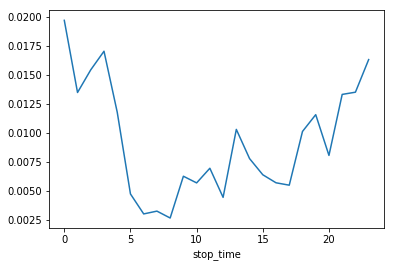

In [174]:
(ri.groupby(pd.to_datetime(ri['stop_time']).dt.hour).drugs_related_stop).mean().plot()

## 8. Do most stops occur at night

In [179]:
ri['hour'] = pd.to_datetime(ri['stop_time']).dt.hour

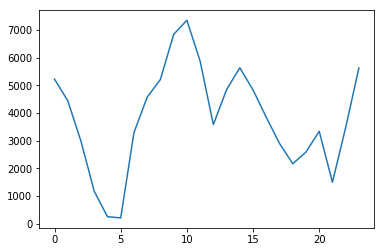

In [205]:
ri['hour'].value_counts().sort_index().plot()

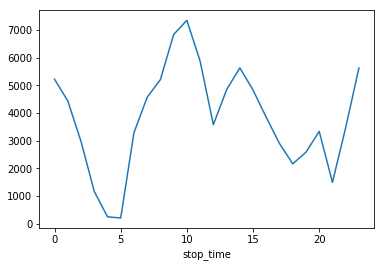

In [209]:
#Method II:
ri.groupby(pd.to_datetime(ri['stop_time']).dt.hour).stop_date.count().plot()

## 9. Find the bad data in the stop_duration column and fix it

In [210]:
# Check missing data
ri['stop_duration'].value_counts(dropna = False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [235]:
# To store NaN as a value, use np.nan
ri.loc[(ri['stop_duration'] == '1') | (ri['stop_duration'] == '2'), 'stop_duration'] = np.nan